In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [178]:
df=pd.read_csv("datacamp_workspace_export_2022-07-25 15 15 06.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### Feature Explanation
    Call Failure:	number of call failures
    Complains:	binary (0: No complaint, 1: complaint)
    Subscription Length:	total months of subscription
    Charge Amount:	ordinal attribute (0: lowest amount, 9: highest amount)
    Seconds of Use:	total seconds of calls
    Frequency of use:	total number of calls
    Frequency of SMS:	total number of text messages
    Distinct Called Numbers:	total number of distinct phone calls
    Age Group:	ordinal attribute (1: younger age, 5: older age)
    Tariff Plan:	binary (1: Pay as you go, 2: contractual)
    Status	binary: (1: active, 2: non-active)
    Age:	age of customer
    Customer Value:	the calculated value of customer
    Churn:	class label (1: churn, 0: non-churn)

### Basic İnformation

In [179]:
def infor(df):
    print("====Shape Of Dataset====")
    print(df.shape)
    print("\n")
    print("====Information About Dataset====")
    print(df.info())
    print("\n")    
    print("====Is there any missing values?====")
    print(df.isnull().sum())
    msno.bar(df)

====Shape Of Dataset====
(1428, 14)


====Information About Dataset====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             1428 non-null   int64  
 1   Complains                1428 non-null   int64  
 2   Subscription Length      1428 non-null   int64  
 3   Charge Amount            1428 non-null   int64  
 4   Seconds of Use           1428 non-null   int64  
 5   Frequency of use         1428 non-null   int64  
 6   Frequency of SMS         1428 non-null   int64  
 7   Distinct Called Numbers  1428 non-null   int64  
 8   Age Group                1428 non-null   int64  
 9   Tariff Plan              1428 non-null   int64  
 10  Status                   1428 non-null   int64  
 11  Age                      1428 non-null   int64  
 12  Customer Value           1428 non-null   float64
 13  Churn 

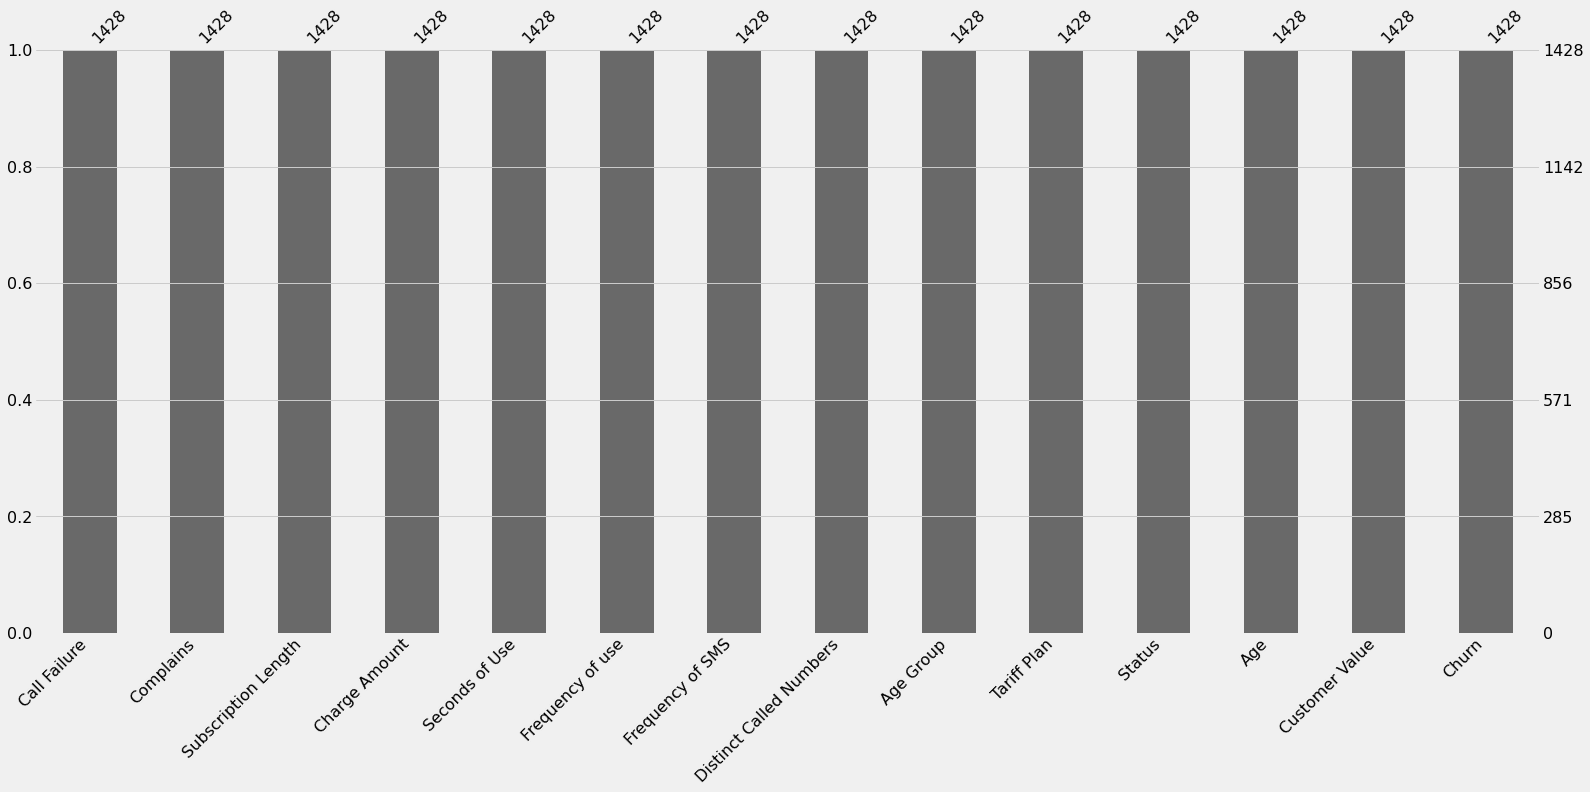

In [180]:
infor(df)

##### As you see there is no missing values on dataset.This is good for us:)

In [181]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [182]:
def distrubution(df,num_cols):
    plt.style.use('fivethirtyeight')
    for i in num_cols:
        plt.figure(figsize=(7,7))
        sns.violinplot(df[i],bins=15)
        plt.title("Distrubution of {}".format(i))
        plt.xlabel(i)
        plt.show()

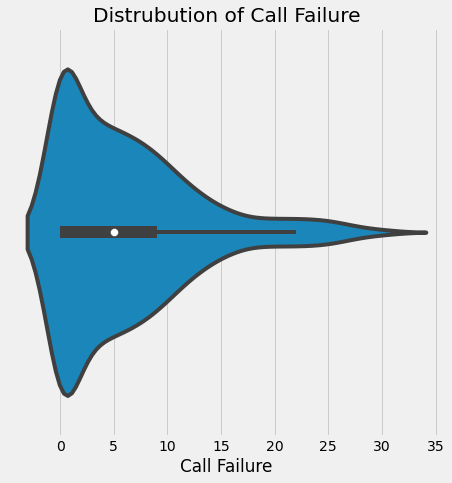

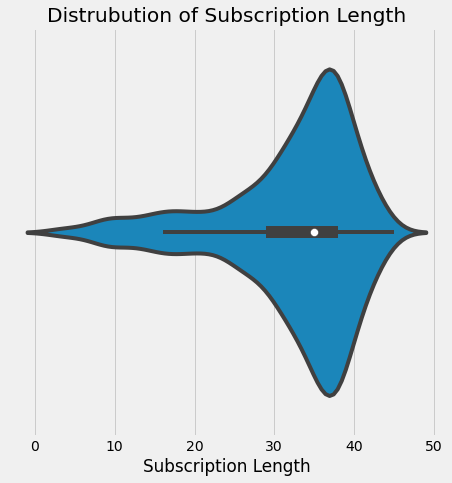

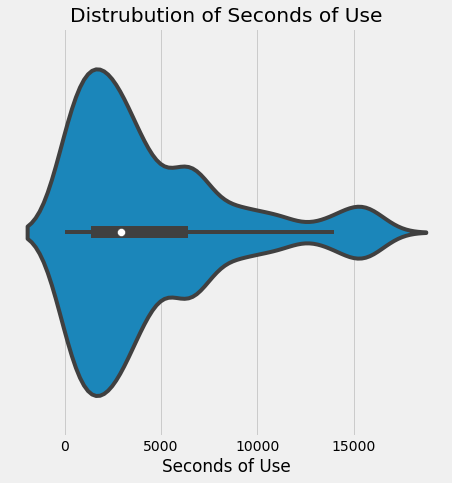

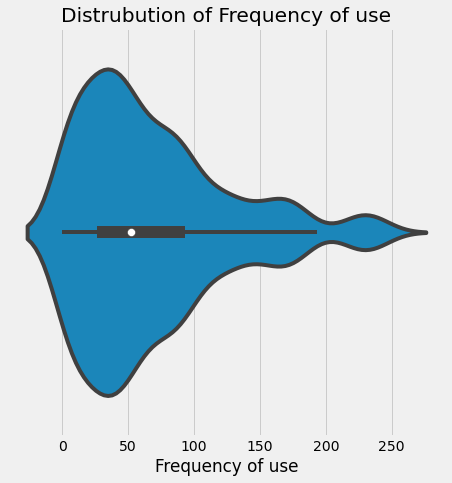

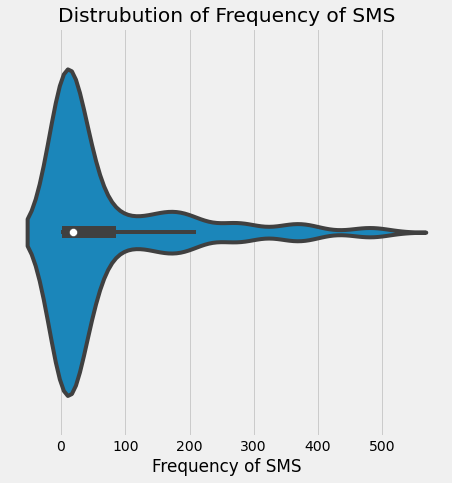

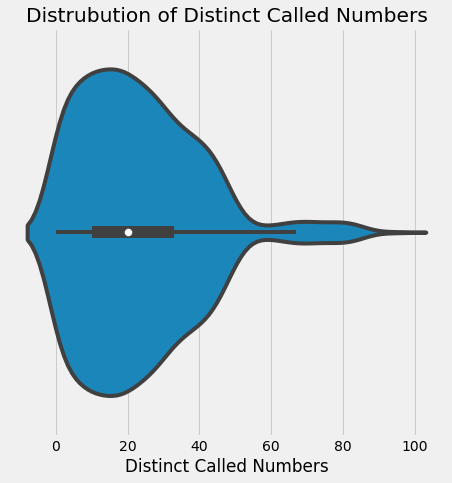

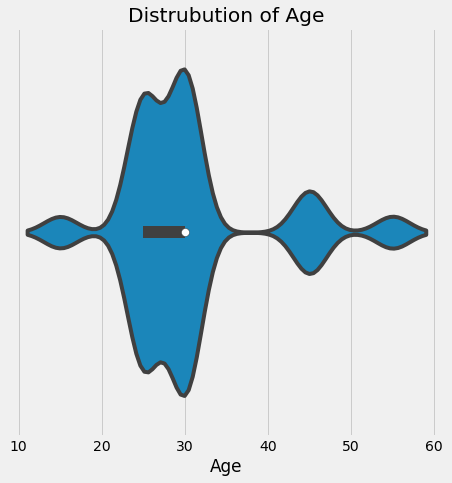

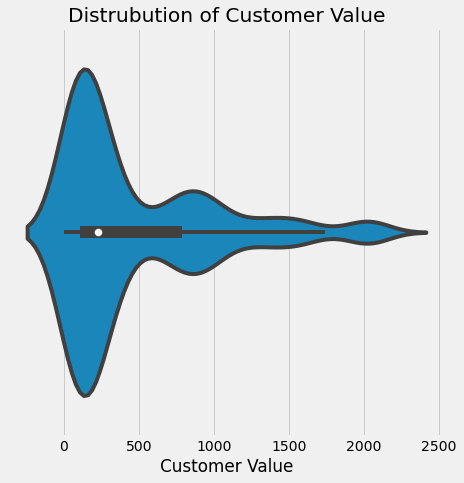

In [183]:
num_cols=["Call Failure","Subscription Length","Seconds of Use","Frequency of use","Frequency of SMS","Distinct Called Numbers","Age","Customer Value"]
distrubution(df,num_cols)

In [184]:
pd.pivot_table(df,index="Complains",columns="Age Group",values="Frequency of SMS")

Age Group,1,2,3,4,5
Complains,,,,,
0,17.131148,82.063559,92.648841,32.578947,24.070175
1,83.000000,34.041667,38.000000,16.454545,4.666667


In [185]:
pd.pivot_table(df,index="Complains",columns="Age Group",values="Frequency of use")

Age Group,1,2,3,4,5
Complains,,,,,
0,74.491803,70.332627,69.483066,66.013158,69.789474
1,138.000000,62.750000,47.966102,14.454545,79.000000


In [186]:
pd.pivot_table(df,index="Complains",columns="Age Group",values="Call Failure")

Age Group,1,2,3,4,5
Complains,,,,,
0,6.770492,5.908898,5.919786,4.907895,7.754386
1,14.000000,10.708333,10.169492,2.909091,18.166667


In [187]:
pd.pivot_table(df,index=["Tariff Plan","Status"],values="Customer Value",columns="Charge Amount")

Charge Amount               0          1           2            3   \
Tariff Plan Status                                                   
1           1       537.823882  562.75826  632.032851   679.141889   
            2        91.919282        NaN         NaN          NaN   
2           1       782.932045  922.07625  988.970714  1301.597857   

Charge Amount                4            5        6           7           8   \
Tariff Plan Status                                                              
1           1        680.681071   714.451667  251.725  257.145833  180.910833   
            2               NaN          NaN      NaN         NaN         NaN   
2           1       1111.545909  1660.095000  248.675  266.400000  188.188750   

Charge Amount             9       10  
Tariff Plan Status                    
1           1       192.4425     NaN  
            2            NaN     NaN  
2           1       176.8950  200.07

In [188]:
pd.pivot_table(df,index=["Tariff Plan","Complains"],values="Seconds of Use",columns="Charge Amount")

Charge Amount                   0            1            2             3   \
Tariff Plan Complains                                                        
1           0          3331.703797  5283.850000  6838.702703   9599.690476   
            1          1906.733333  3024.300000  1594.333333  11472.666667   
2           0          3661.238095  4760.947368  5498.300000   6926.500000   
            1          1010.000000  2306.600000  1315.000000           NaN   

Charge Amount                    4        5       6             7        8   \
Tariff Plan Complains                                                         
1           0          11015.545455  11956.0  9985.0  10199.166667  10424.0   
            1          16323.333333      NaN     NaN           NaN  10435.0   
2           0           8814.285714   7565.0  9870.0  10315.000000  10227.5   
            1           7242.500000      NaN     NaN           NaN  10412.5   

Charge Amount                    9        10  
Tariff Plan Complains                         
1           0          10550.000000      NaN  
            1          10515.000000      NaN  
2           0          10758.333333  11035.0  
            1          10495.000000      NaN

### Relationship between failure calls , customer value and tariff plan

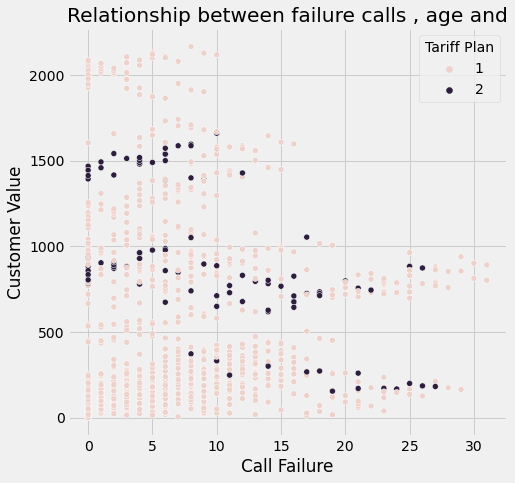

In [189]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Call Failure",y="Customer Value",hue="Tariff Plan",data=df)
plt.title("Relationship between failure calls , age and")
plt.show()

### Relationship between seconds of use and frequency of use

In [190]:
plt.figure(figsize=(7,7))
fig=px.scatter(data_frame=df,x="Seconds of Use",y="Frequency of use",color="Age Group",)
fig.show()

<Figure size 504x504 with 0 Axes>

In [191]:
plt.figure(figsize=(7,7))
fig=px.scatter(data_frame=df,x="Seconds of Use",y="Frequency of SMS",color="Age Group",)
fig.show()

<Figure size 504x504 with 0 Axes>

### Which age groups send more SMS messages than make phone calls?

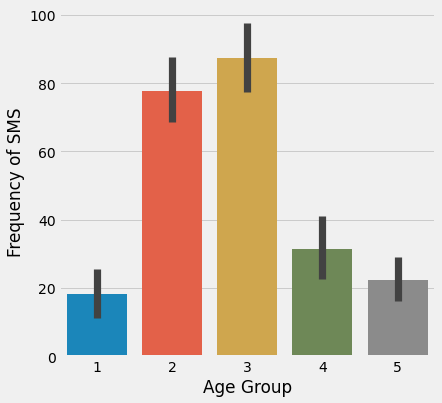

In [192]:
plt.figure(figsize=(6,6))
sns.barplot(x="Age Group",y="Frequency of SMS",data=df)
plt.show()

### The number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).

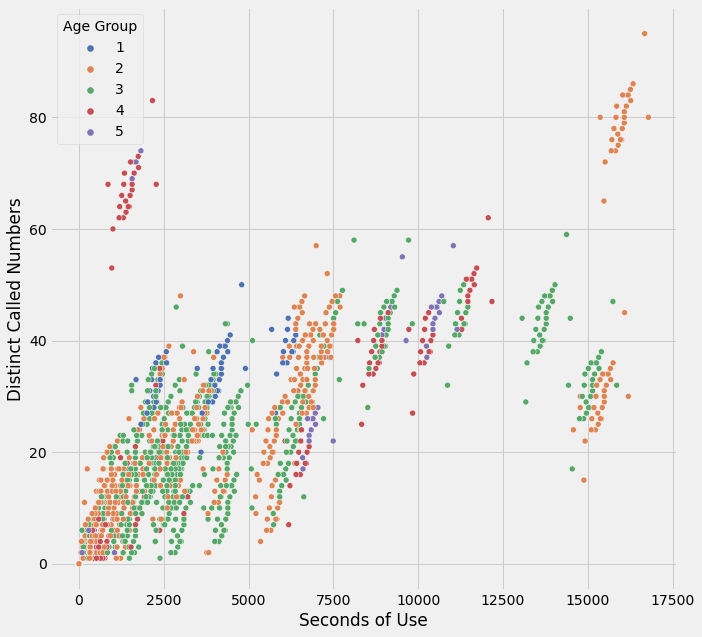

In [193]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Seconds of Use",y="Distinct Called Numbers",data=df,hue="Age Group",palette="deep")
plt.show()

### Are there significant differences between the length of phone calls between different tariff plans?

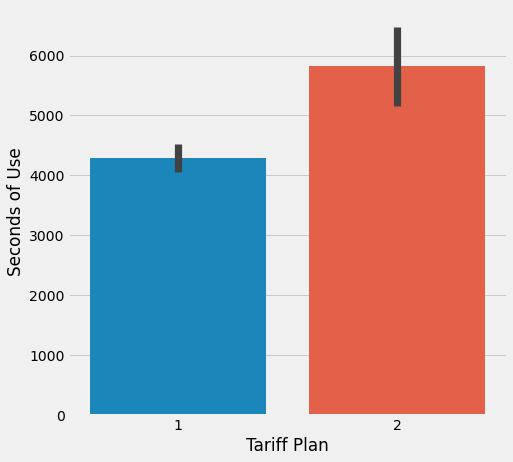

In [194]:
plt.figure(figsize=(7,7))
sns.barplot(x="Tariff Plan",y="Seconds of Use",data=df)
plt.show()

In [195]:
def num_to_cat(df,col):
    cat=[]
    for i in col:
        
        k=df[i].value_counts().shape[0]
        if k<10:
            df[i]=df[i].astype("category")
            cat.append(i)
    
    print(df.info())
    return cat

#### This function find the categorical features and change their type to category

In [196]:
cat=num_to_cat(df,df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Call Failure             1428 non-null   int64   
 1   Complains                1428 non-null   category
 2   Subscription Length      1428 non-null   int64   
 3   Charge Amount            1428 non-null   int64   
 4   Seconds of Use           1428 non-null   int64   
 5   Frequency of use         1428 non-null   int64   
 6   Frequency of SMS         1428 non-null   int64   
 7   Distinct Called Numbers  1428 non-null   int64   
 8   Age Group                1428 non-null   category
 9   Tariff Plan              1428 non-null   category
 10  Status                   1428 non-null   category
 11  Age                      1428 non-null   category
 12  Customer Value           1428 non-null   float64 
 13  Churn                    1428 non-null   category
dtypes: categ

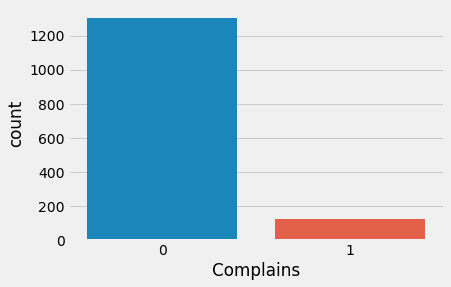

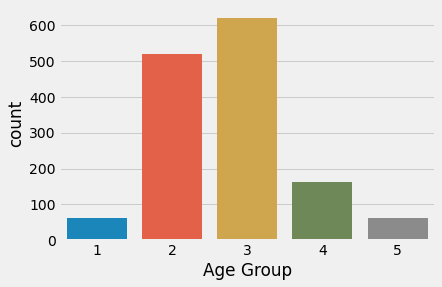

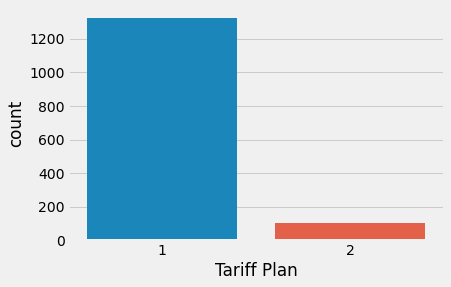

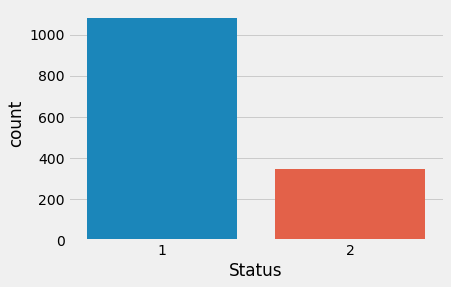

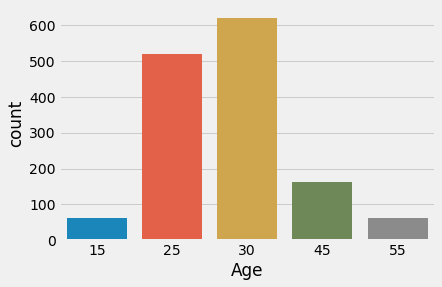

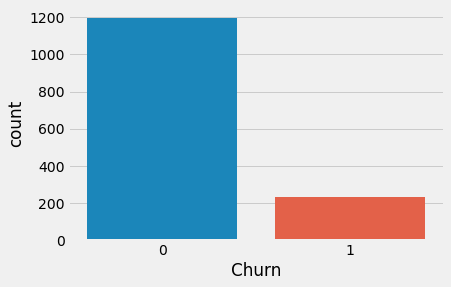

In [197]:
for i in cat:
    sns.countplot(df[i])
    plt.show()

In [198]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [199]:
pd.pivot_table(df,index=["Age Group","Tariff Plan","Status"],values="Seconds of Use",columns="Churn")

Churn                                    0            1
Age Group Tariff Plan Status                           
1         1           1        3270.142857          NaN
          2           1        6091.692308          NaN
2         1           1        6160.615658  4275.827586
                      2         487.975000   765.761194
          2           1        5228.627119  1331.250000
3         1           1        5624.067442  1516.250000
                      2        1531.746667  1619.281690
          2           1        5368.533333  1315.000000
4         1           1        5946.210000   357.000000
                      2         688.461538   733.379310
          2           1       10447.000000          NaN
5         1           1        4686.203704     0.000000
          2           1       10609.375000          NaN

In [200]:
pd.pivot_table(df,index=["Age Group","Tariff Plan","Status"],values="Subscription Length",columns="Churn")

Churn                                 0          1
Age Group Tariff Plan Status                      
1         1           1       37.122449        NaN
          2           1       14.153846        NaN
2         1           1       32.402135  29.344828
                      2       33.737500  32.880597
          2           1       26.728814  27.250000
3         1           1       33.106977  16.500000
                      2       36.453333  35.647887
          2           1       31.466667  32.000000
4         1           1       27.840000  34.000000
                      2       26.384615  35.517241
          2           1       35.400000        NaN
5         1           1       33.277778  30.000000
          2           1       38.250000        NaN

<AxesSubplot:>

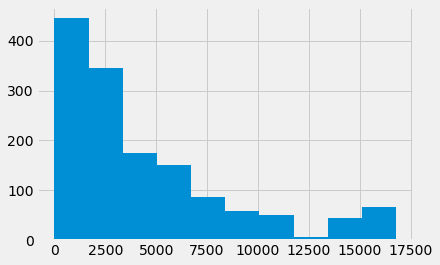

In [201]:
df["Seconds of Use"].hist()

In [202]:
num_col=[]
for i in df.columns:
    if not(i in cat):
        num_col.append(i)

In [203]:
num_col

['Call Failure',
 'Subscription Length',
 'Charge Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Customer Value']

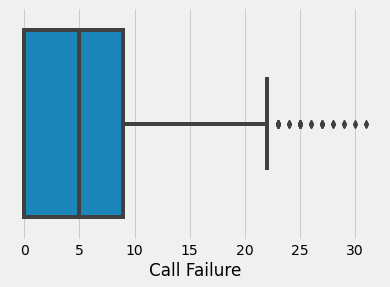

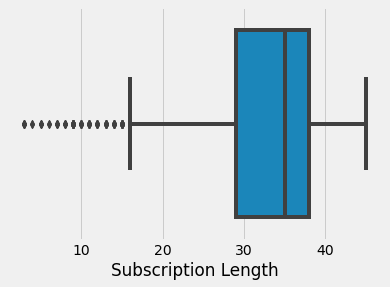

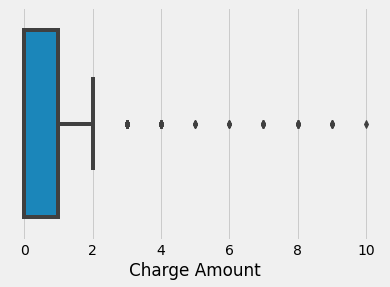

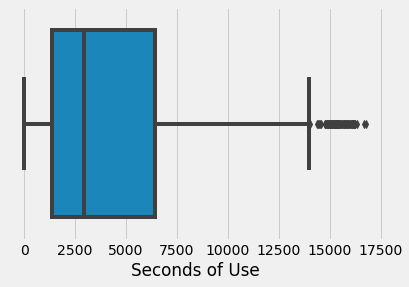

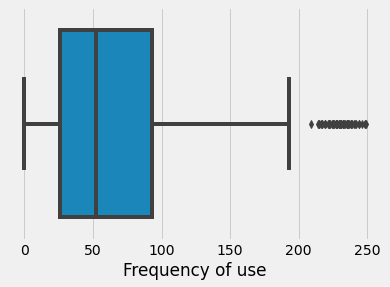

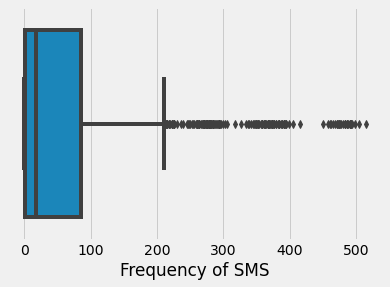

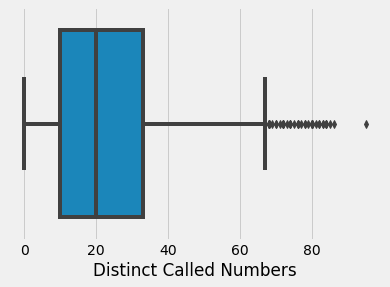

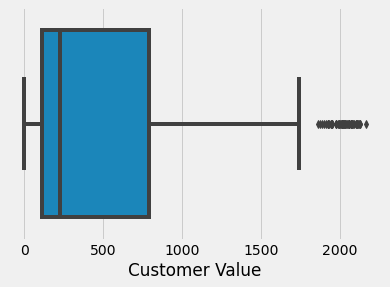

In [204]:
for i in num_col:
    sns.boxplot(df[i])
    plt.show()

### Correlation between features

<AxesSubplot:>

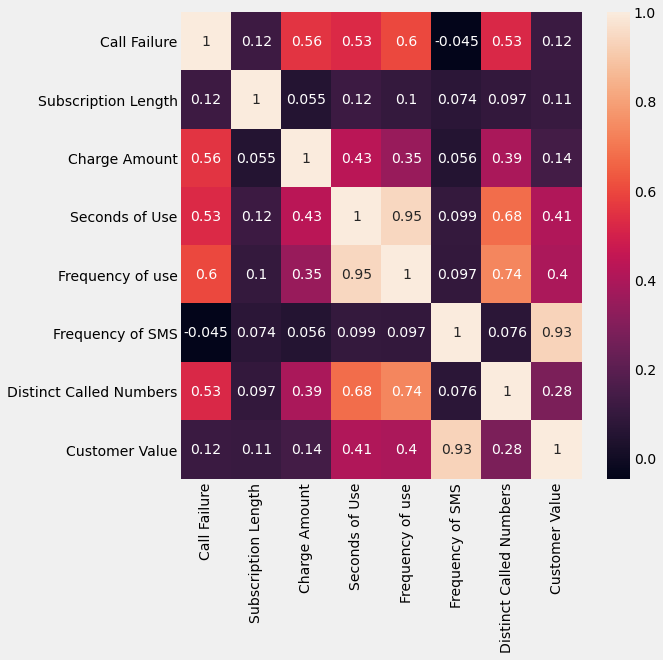

In [205]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [206]:
cat=cat[:5]

In [207]:
new=pd.get_dummies(data=df[cat])

In [208]:
new

,Complains_0,Complains_1,Age Group_1,Age Group_2,Age Group_3,Age Group_4,Age Group_5,Tariff Plan_1,Tariff Plan_2,Status_1,Status_2,Age_15,Age_25,Age_30,Age_45,Age_55
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
4,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1424,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
1425,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
1426,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [209]:
new_df=pd.concat([df,new],axis=1)

In [210]:
new_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,...,Age Group_5,Tariff Plan_1,Tariff Plan_2,Status_1,Status_2,Age_15,Age_25,Age_30,Age_45,Age_55
0,8,0,38,0,4370,71,5,17,3,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,39,0,318,5,7,4,2,1,...,0,1,0,0,1,0,1,0,0,0
2,10,0,37,0,2453,60,359,24,3,1,...,0,1,0,1,0,0,0,1,0,0
3,10,0,38,0,4198,66,1,35,1,1,...,0,1,0,1,0,1,0,0,0,0
4,3,0,38,0,2393,58,2,33,1,1,...,0,1,0,1,0,1,0,0,0,0


In [211]:
new_df.drop(cat,axis=1,inplace=True)

In [212]:
new_df.head()

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value,Churn,Complains_0,...,Age Group_5,Tariff Plan_1,Tariff Plan_2,Status_1,Status_2,Age_15,Age_25,Age_30,Age_45,Age_55
0,8,38,0,4370,71,5,17,197.640,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,39,0,318,5,7,4,46.035,0,1,...,0,1,0,0,1,0,1,0,0,0
2,10,37,0,2453,60,359,24,1536.520,0,1,...,0,1,0,1,0,0,0,1,0,0
3,10,38,0,4198,66,1,35,240.020,0,1,...,0,1,0,1,0,1,0,0,0,0
4,3,38,0,2393,58,2,33,145.805,0,1,...,0,1,0,1,0,1,0,0,0,0


### Modelling

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [214]:
rf=RandomForestClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()
xgb=XGBClassifier()

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [217]:
X=new_df.drop("Churn",axis=1)
y=new_df["Churn"]

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [223]:
X_train.shape

(1142, 24)

In [224]:
X_test.shape

(286, 24)

In [225]:
y_train.shape

(1142,)

In [227]:
acc_list=[]
model_list=[rf,lr,dt,knn,gb,nb,xgb]
for i in model_list:
    i=i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    acc_list.append(accuracy_score(y_pred,y_test))

[00:27:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [228]:
acc_list

[0.9405594405594405,
 0.8181818181818182,
 0.9125874125874126,
 0.8321678321678322,
 0.9300699300699301,
 0.7097902097902098,
 0.9440559440559441]

In [232]:
model_names=["rf","lr","dt","knn","gb","nb","xgb"]

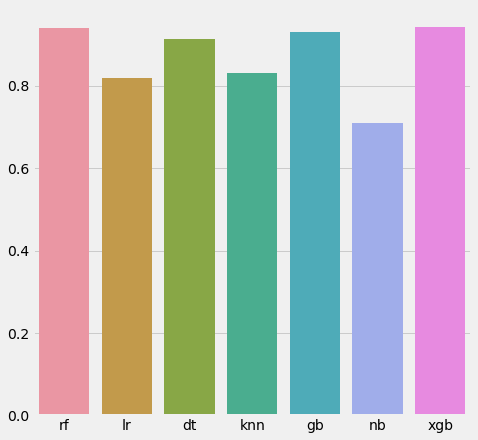

In [234]:
plt.figure(figsize=(7,7))
sns.barplot(x=model_names,y=acc_list,)
plt.show()

### The best model is XGBoost.Lets make some tuning

In [244]:
from sklearn.model_selection import GridSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "eval_metric":['mlogloss']
        }
xgb_tuned=GridSearchCV(xgb,param_grid=params,cv=3)

In [245]:
xgb_tuned.fit(X_train,y_train)
y_pred=xgb_tuned.predict(X_test)
print(xgb_tuned.best_params_)

{'colsample_bytree': 1.0, 'eval_metric': 'mlogloss', 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}


In [247]:
new_xgb=XGBClassifier(colsample_bytree= 1.0, eval_metric= 'mlogloss', gamma= 1, max_depth= 4, min_child_weight= 1, subsample= 1.0)
new_xgb.fit(X_train,y_train)
y_pred=new_xgb.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9370629370629371


#### Tuning doesn't work

#### Whatever we have a plently good accuracy(%94.40)